In [1]:
#pip install pulsee
import numpy as np
import qutip as qt
import pulsee.plot as psplt
import operators as op # "import *" is bad Python practice, but simplest way to do some math
from operators import CLEAN_1000, CLEAN_0100, CLEAN_0010, CLEAN_0001, RHO_1000, RHO_0100, RHO_0010, RHO_0001, IDENTITY, Ix, Iy, Iz, Sx, Sy, Sz, IxSx, IxSy, IxSz, IySx, IySy, IySz, IzSx, IzSy, IzSz

In [2]:
# Even though in Python, matrix multiplication proceeds left to right. Operator notation is definied such that the right most operator is applied first.
#So this means that the first applied pulse should be all the way on the right.
#Figure
J=7
pi=np.pi

U_0 = op.IDENTITY
U_1 = op.Rx_I(pi/2) * op.U_J(1/(2*J),J) * op.Rx_S(pi/2) * op.Ry_I(pi/2) * op.U_J(1/(2*J),J) * op.Ry_S(pi/2)
U_2 = op.Rx_S(pi/2) * op.U_J(1/(2*J),J) * op.Ry_S(pi/2) * op.Rx_I(pi/2) * op.U_J(1/(2*J),J) * op.Ry_I(pi/2)

In [3]:
#From Sympy-2spin.ipynb

Thermal = qt.Qobj(
[[ 1.49582277e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.49582277e-06]]
, dims=[[2, 2], [2, 2]])

In [4]:
#flip to 10 as in paper
#Thermal_10=op.Rz_I(pi)*Thermal*op.Rz_I(pi).dag()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.49582277e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.49582277e-06]]

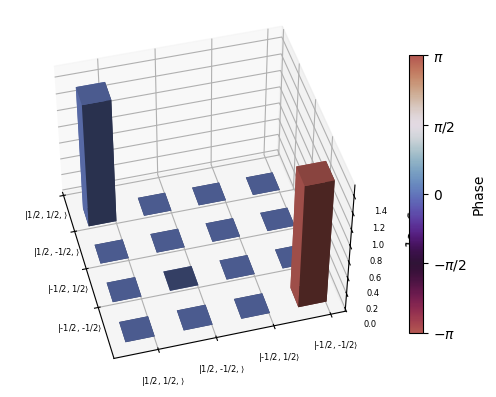

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [5]:
rho_0= U_0 * Thermal * U_0.dag()
display(rho_0)
psplt.plot_complex_density_matrix(rho_0)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.49582277e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.49582277e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

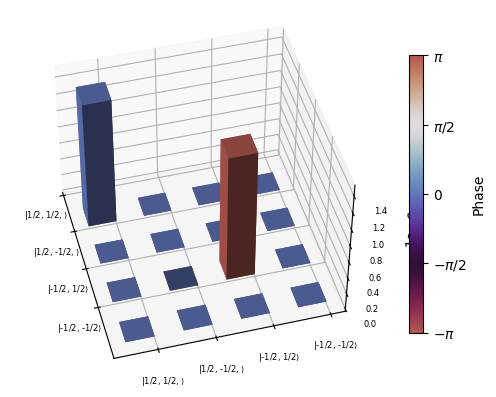

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [6]:
rho_1= U_1 * Thermal * U_1.dag()
display(rho_1)
psplt.plot_complex_density_matrix(rho_1)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.49582277e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.49582277e-06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

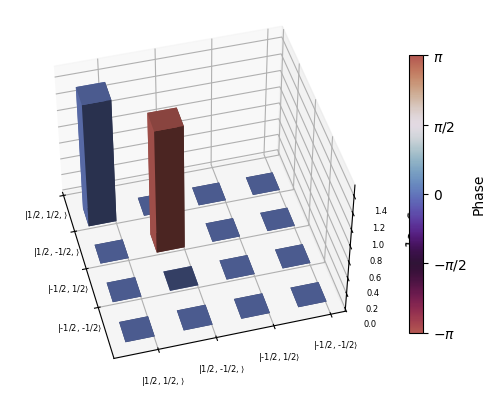

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [7]:
rho_2= U_2 * Thermal * U_2.dag()
display(rho_2)
psplt.plot_complex_density_matrix(rho_2)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.48746831e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.49582277e-06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.49582277e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.49582277e-06]]

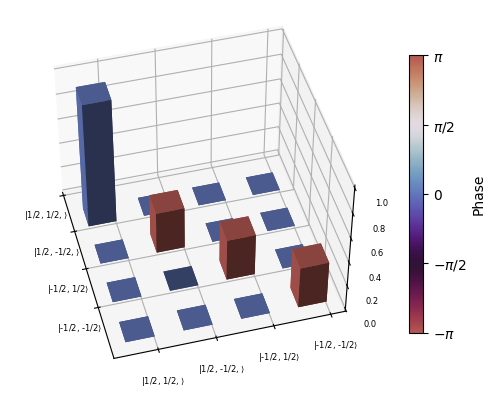

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.33333333  0.          0.        ]
 [ 0.          0.         -0.33333333  0.        ]
 [ 0.          0.          0.         -0.33333333]]


In [8]:
pseudo_pure=rho_0+rho_1+rho_2
display(pseudo_pure)
psplt.plot_complex_density_matrix(pseudo_pure/pseudo_pure[0,0])
print(pseudo_pure/pseudo_pure[0,0])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.48746831e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.49582277e-06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.49582277e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.49582277e-06]]

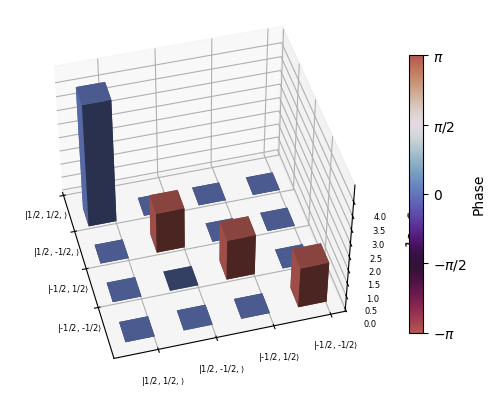

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.48746831e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.49582277e-06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.49582277e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.49582277e-06]]


In [9]:
pseudo_pure=rho_0+rho_1+rho_2
display(pseudo_pure)
psplt.plot_complex_density_matrix(pseudo_pure)
print(pseudo_pure)